# Zeros of Transmission Matrix Entries

We seem to have that for any guide with transmission matrix $M(Z)$ that  $M(Z)[0,0] = 0$ if and only if $M(Z^*)[1,1] = 0$.  Checking this out here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex, plot_complex_surface
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

In [22]:
A = SlabExact(ns=[2, 1], Ts=[2,2], xrefs=[100, 100], symmetric=True)

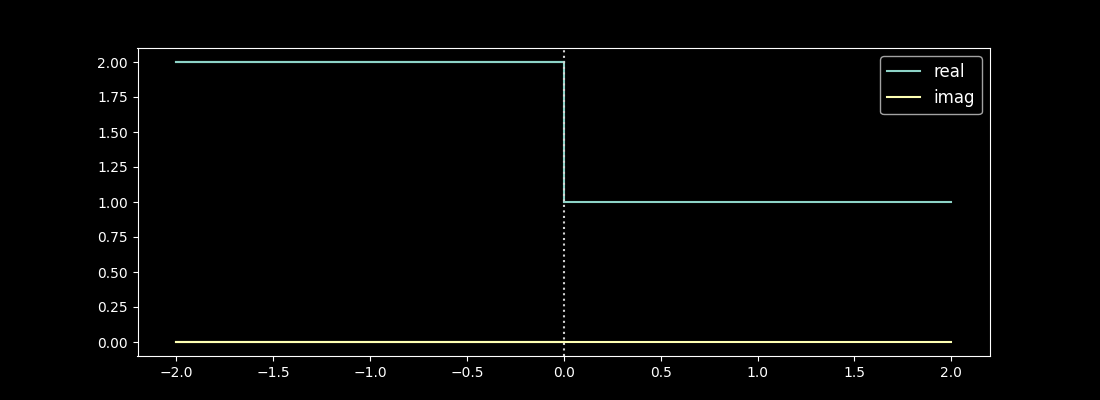

In [23]:
A.plot_refractive_index();

## Plotting $M[1,1]$ (mode type guided) and $M[0,0]$ (mode type leaky).

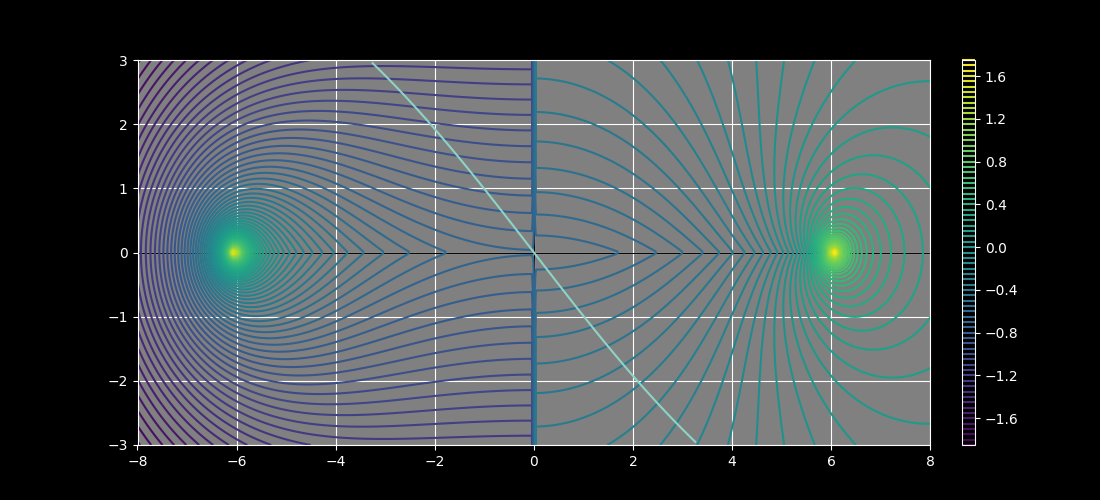

In [24]:
A.determinant_plot(-8, 8, -3, 3, mode_type='guided');

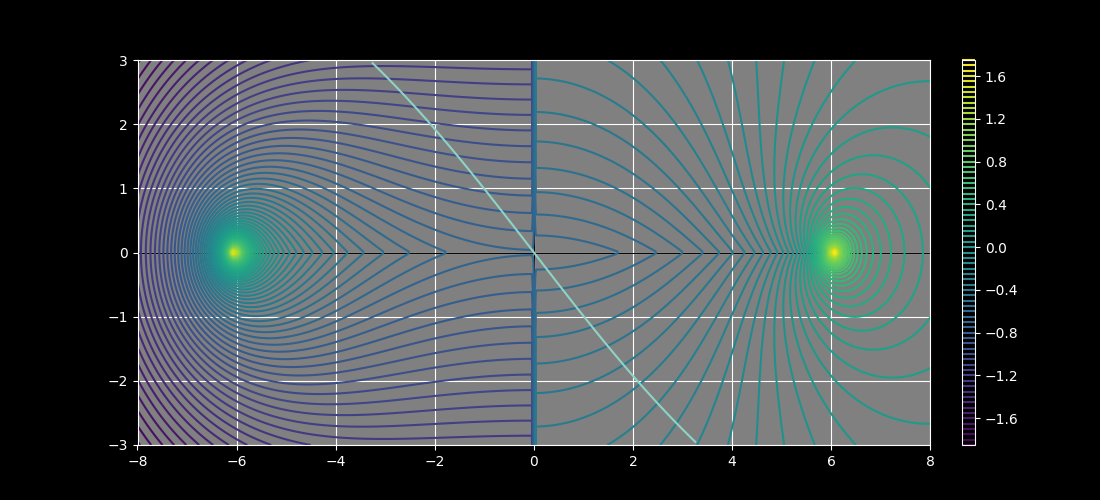

In [25]:
A.determinant_plot(-8, 8, -3, 3, mode_type='leaky');

Even further it looks like they are the exact same function but conjugated: $M(Z^*)[0,0] = M(Z)[1,1]$, or something quite similar

In [29]:
Z = 1 + 2j
A.transmission_matrix(Z)[0], A.transmission_matrix(Z.conjugate())[0].conjugate()

(array([[0.66239175-0.0712099j, 0.33760825+0.0712099j],
        [0.33760825+0.0712099j, 0.66239175-0.0712099j]]),
 array([[0.66239175-0.0712099j, 0.33760825+0.0712099j],
        [0.33760825+0.0712099j, 0.66239175-0.0712099j]]))

In [27]:
def check_entries(Z, diag=False):
    M1 = A.transmission_matrix(Z)
    M2 = A.transmission_matrix(Z.conjugate()).conjugate()
    if diag:
        return M1[..., 0, 0] - M2[..., 1,1]
    else:
        return M1[..., 0, 1] - M2[..., 1,0]


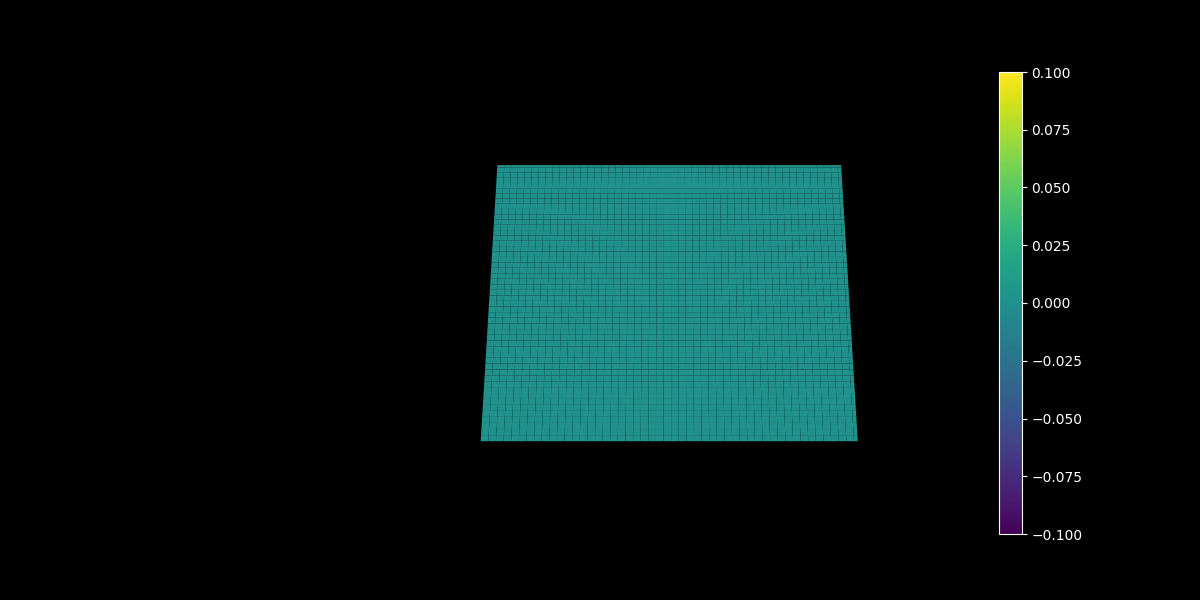

In [28]:
plot_complex_surface(check_entries, -5, 5, -5, 5, log_abs=False, iref=100, rref=100)

## Observations

- Does appear that entries opposite each other in $M(Z)$ and $M^*(Z^*)$ are equal for quite general purposes.

- I've checked non-symmetric geometries, even ones with differing outer indices of refraction, and it holds.

- Does not hold for complex refractive indices however, at least not with how we are calculating $Z_j$ from $Z_0$.

## Check transmission matrix then

We should see the same properties there, at least in theory since we could do a 2 layer guide.